# Pandas, Numpy, Matplotlib, seaborn and more

In [39]:
# Importing necessary libraries for data analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib
import scipy  # For scientific and technical computing (including optimization, integration, and statistics)
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For preprocessing data (scaling, encoding)
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation metrics
import statsmodels.api as sm  # For statistical modeling and hypothesis testing

In [40]:
dict1 = {
    "name":['satender', 'rohan', 'rahul', 'ajay'],
    "marks":[92, 34, 34, 17],
    "city":['london', 'ontario', 'ajex', 'windsor']
}

In [41]:
df = pd.DataFrame(dict1)

In [42]:
df

,name,marks,city
0,satender,92,london
1,rohan,34,ontario
2,rahul,34,ajex
3,ajay,17,windsor


In [43]:
import pandas as pd
import numpy as np

dict1 = {
    "name": ['satender', 'rohan', 'rahul', 'ajay'],
    "marks": [92, 34, 34, 17],
    "city": ['london', 'ontario', 'ajex', 'windsor']
}


In [44]:
df = pd.DataFrame(dict1)

In [45]:
df

,name,marks,city
0,satender,92,london
1,rohan,34,ontario
2,rahul,34,ajex
3,ajay,17,windsor


In [46]:
import pandas as pd
import numpy as np

# Define the DataFrame
dict1 = {
    "name": ['satender', 'rohan', 'rahul', 'ajay'],
    "marks": [92, 34, 34, 17],
    "city": ['london', 'ontario', 'ajex', 'windsor']
}

df = pd.DataFrame(dict1)

# Add a calculated column 'grade' based on marks
df['grade'] = np.select(
    [
        df['marks'] >= 90, 
        df['marks'] >= 75, 
        df['marks'] >= 50, 
        df['marks'] >= 35
    ],
    ['A', 'B', 'C', 'D'],
    default='F'
)

In [47]:
print(df)

       name  marks     city grade
0  satender     92   london     A
1     rohan     34  ontario     F
2     rahul     34     ajex     F
3      ajay     17  windsor     F


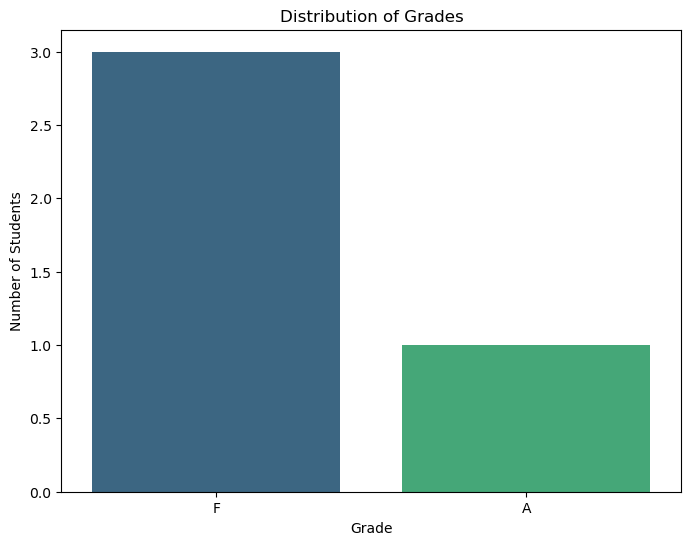

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of students in each grade
grade_counts = df['grade'].value_counts()

# Create a bar plot with the updated syntax
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values, hue=grade_counts.index, dodge=False, palette='viridis', legend=False)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()


In [49]:
import pandas as pd
import numpy as np

# Original DataFrame
dict1 = {
    "name": ['satender', 'rohan', 'rahul', 'ajay'],
    "marks": [92, 34, 34, 17],
    "city": ['london', 'ontario', 'ajex', 'windsor']
}
df = pd.DataFrame(dict1)

# Add a column for pass/fail status based on marks
df['status'] = df['marks'].apply(lambda x: 'Pass' if x >= 35 else 'Fail')

# Add a column for a custom grade based on multiple criteria
def custom_grade(row):
    if row['marks'] >= 90:
        return 'A+'
    elif row['marks'] >= 75:
        return 'A'
    elif row['marks'] >= 50:
        return 'B'
    elif row['marks'] >= 35:
        return 'C'
    else:
        return 'F'

df['custom_grade'] = df.apply(custom_grade, axis=1)

print(df)


       name  marks     city status custom_grade
0  satender     92   london   Pass           A+
1     rohan     34  ontario   Fail            F
2     rahul     34     ajex   Fail            F
3      ajay     17  windsor   Fail            F


In [50]:
# Group by city and calculate the mean, sum, and count of marks
city_group = df.groupby('city')['marks'].agg(['mean', 'sum', 'count'])

# Add a column for the rank of each student within their city
df['rank_within_city'] = df.groupby('city')['marks'].rank(ascending=False)

print(city_group)
print(df)


         mean  sum  count
city                     
ajex     34.0   34      1
london   92.0   92      1
ontario  34.0   34      1
windsor  17.0   17      1
       name  marks     city status custom_grade  rank_within_city
0  satender     92   london   Pass           A+               1.0
1     rohan     34  ontario   Fail            F               1.0
2     rahul     34     ajex   Fail            F               1.0
3      ajay     17  windsor   Fail            F               1.0


In [51]:
# Create a pivot table to show the average marks and count of students by city and status
pivot_table = pd.pivot_table(df, values='marks', index='city', columns='status', aggfunc={'marks': ['mean', 'count']})

print(pivot_table)


        count       mean      
status   Fail Pass  Fail  Pass
city                          
ajex      1.0  NaN  34.0   NaN
london    NaN  1.0   NaN  92.0
ontario   1.0  NaN  34.0   NaN
windsor   1.0  NaN  17.0   NaN


In [52]:
# Additional DataFrame with more student information
additional_info = pd.DataFrame({
    'name': ['satender', 'rohan', 'rahul', 'ajay', 'vikram'],
    'age': [22, 21, 22, 23, 24],
    'gender': ['M', 'M', 'M', 'M', 'M']
})

# Merge on the 'name' column
merged_df = pd.merge(df, additional_info, on='name', how='left')

print(merged_df)


       name  marks     city status custom_grade  rank_within_city  age gender
0  satender     92   london   Pass           A+               1.0   22      M
1     rohan     34  ontario   Fail            F               1.0   21      M
2     rahul     34     ajex   Fail            F               1.0   22      M
3      ajay     17  windsor   Fail            F               1.0   23      M


In [53]:
# Introduce some missing data for demonstration
merged_df.loc[merged_df['name'] == 'vikram', 'marks'] = np.nan

# Fill missing data with the mean of the column
merged_df['marks_filled'] = merged_df['marks'].fillna(merged_df['marks'].mean())

# Alternatively, interpolate missing values based on surrounding data
merged_df['marks_interpolated'] = merged_df['marks'].interpolate()

print(merged_df)


       name  marks     city status custom_grade  rank_within_city  age gender  \
0  satender   92.0   london   Pass           A+               1.0   22      M   
1     rohan   34.0  ontario   Fail            F               1.0   21      M   
2     rahul   34.0     ajex   Fail            F               1.0   22      M   
3      ajay   17.0  windsor   Fail            F               1.0   23      M   

   marks_filled  marks_interpolated  
0          92.0                92.0  
1          34.0                34.0  
2          34.0                34.0  
3          17.0                17.0  


In [54]:
# Filter students who passed and scored more than the average marks of the class
average_marks = df['marks'].mean()
filtered_students = df[(df['status'] == 'Pass') & (df['marks'] > average_marks)]

print(filtered_students)


       name  marks    city status custom_grade  rank_within_city
0  satender     92  london   Pass           A+               1.0


In [55]:
# Calculate a rolling average of marks with a window size of 2
df['rolling_avg'] = df['marks'].rolling(window=2).mean()

print(df)


       name  marks     city status custom_grade  rank_within_city  rolling_avg
0  satender     92   london   Pass           A+               1.0          NaN
1     rohan     34  ontario   Fail            F               1.0         63.0
2     rahul     34     ajex   Fail            F               1.0         34.0
3      ajay     17  windsor   Fail            F               1.0         25.5


In [56]:
# Custom function to generate a summary for each row
def summarize_row(row):
    return f"{row['name']} from {row['city']} scored {row['marks']} and got grade {row['custom_grade']}."

df['summary'] = df.apply(summarize_row, axis=1)

print(df['summary'])


0    satender from london scored 92 and got grade A+.
1       rohan from ontario scored 34 and got grade F.
2          rahul from ajex scored 34 and got grade F.
3        ajay from windsor scored 17 and got grade F.
Name: summary, dtype: object


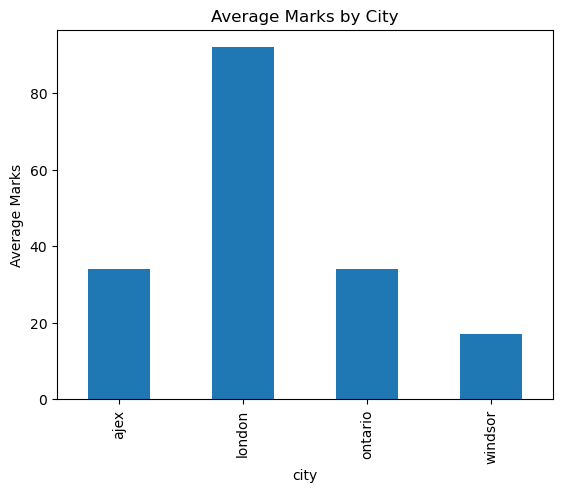

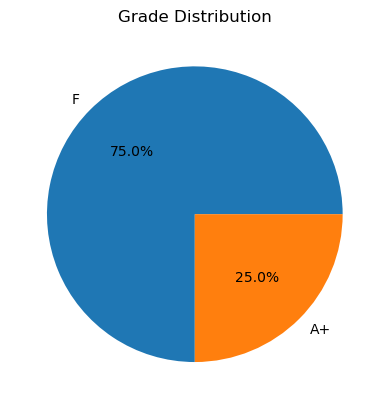

In [57]:
import matplotlib.pyplot as plt

# Bar plot for average marks by city
df.groupby('city')['marks'].mean().plot(kind='bar', title='Average Marks by City')
plt.ylabel('Average Marks')
plt.show()

# Pie chart for distribution of grades
df['custom_grade'].value_counts().plot(kind='pie', title='Grade Distribution', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


In [58]:
# Set a MultiIndex with 'city' and 'name'
df_multiindex = df.set_index(['city', 'name'])

# Access data using the MultiIndex
print(df_multiindex.loc['london'].loc['satender'])

# Reset the index to default
df_reset = df_multiindex.reset_index()
print(df_reset)


marks                                                             92
status                                                          Pass
custom_grade                                                      A+
rank_within_city                                                 1.0
rolling_avg                                                      NaN
summary             satender from london scored 92 and got grade A+.
Name: satender, dtype: object
      city      name  marks status custom_grade  rank_within_city  \
0   london  satender     92   Pass           A+               1.0   
1  ontario     rohan     34   Fail            F               1.0   
2     ajex     rahul     34   Fail            F               1.0   
3  windsor      ajay     17   Fail            F               1.0   

   rolling_avg                                           summary  
0          NaN  satender from london scored 92 and got grade A+.  
1         63.0     rohan from ontario scored 34 and got grade F.  
2        

In [59]:
# Convert 'custom_grade' to a categorical type with order
grades = ['F', 'D', 'C', 'B', 'A', 'A+']
df['custom_grade'] = pd.Categorical(df['custom_grade'], categories=grades, ordered=True)

# Sort DataFrame by categorical grade
df_sorted_by_grade = df.sort_values('custom_grade')

print(df_sorted_by_grade)


       name  marks     city status custom_grade  rank_within_city  \
1     rohan     34  ontario   Fail            F               1.0   
2     rahul     34     ajex   Fail            F               1.0   
3      ajay     17  windsor   Fail            F               1.0   
0  satender     92   london   Pass           A+               1.0   

   rolling_avg                                           summary  
1         63.0     rohan from ontario scored 34 and got grade F.  
2         34.0        rahul from ajex scored 34 and got grade F.  
3         25.5      ajay from windsor scored 17 and got grade F.  
0          NaN  satender from london scored 92 and got grade A+.  


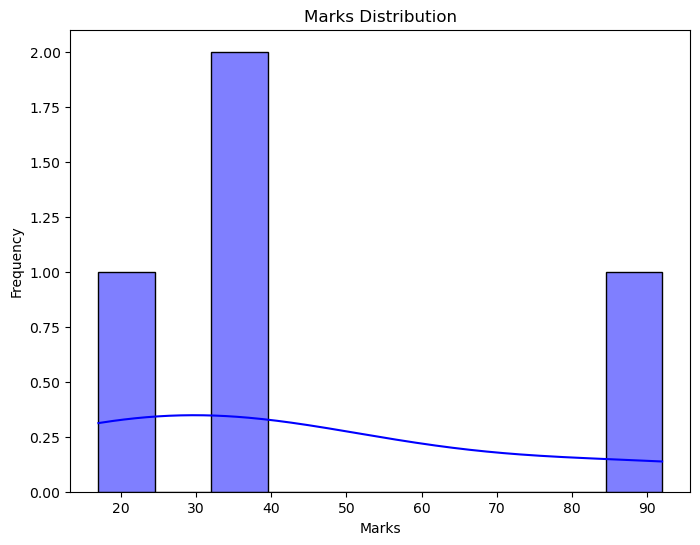

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['marks'], bins=10, kde=True, color='blue')
plt.title('Marks Distribution')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

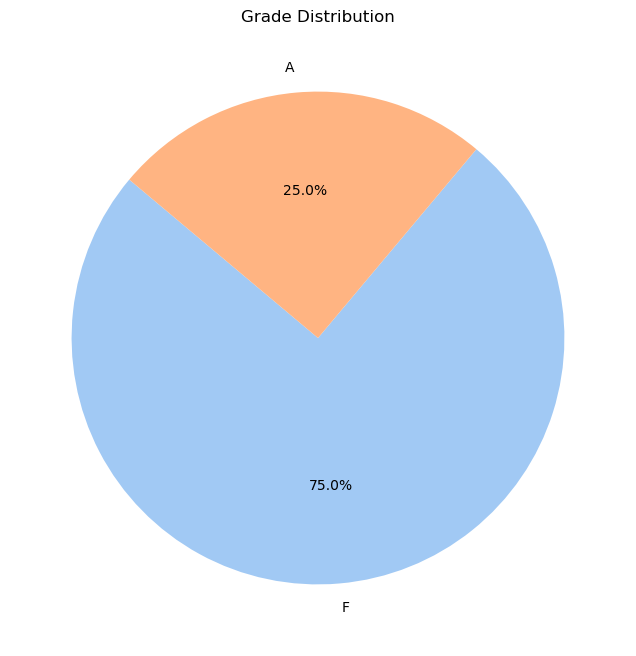

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Grade Distribution')
plt.show()


In [66]:
# Binning an array of data
data = np.random.randn(1000)  # Generate 1000 random numbers
bins = np.linspace(-3, 3, 7)  # Create 6 bins between -3 and 3
digitized = np.digitize(data, bins)

# Counting the number of elements in each bin
bin_counts = np.bincount(digitized)
print("Bin Counts:", bin_counts)


Bin Counts: [  1  26 135 334 346 131  26   1]


In [67]:
import numpy as np

# Vectorized operation using ufunc
arr = np.array([1, 2, 3, 4, 5])

# Example of vectorized operation
result = np.exp(arr)  # Exponential function applied element-wise
print("Exponential of Array:", result)

# Custom ufunc
def custom_func(x, y):
    return x + y * y

# Vectorized using np.vectorize
vectorized_func = np.vectorize(custom_func)
result = vectorized_func(arr, arr)
print("Custom Ufunc Result:", result)


Exponential of Array: [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
Custom Ufunc Result: [ 2  6 12 20 30]


In [68]:
# Example of broadcasting without memory duplication
arr1 = np.array([[1], [2], [3]])
arr2 = np.array([4, 5, 6])

# Broadcasting adds arr2 to each row of arr1 without copying data
result = arr1 + arr2
print("Broadcasted Result:\n", result)

# Memory-efficient operation
print("Memory Address of arr1:", arr1.__array_interface__['data'])
print("Memory Address of arr2:", arr2.__array_interface__['data'])


Broadcasted Result:
 [[5 6 7]
 [6 7 8]
 [7 8 9]]
Memory Address of arr1: (2162781248528, False)
Memory Address of arr2: (2162781248048, False)


In [69]:
# Integer array indexing
arr = np.array([[1, 2], [3, 4], [5, 6]])
print("Original Array:\n", arr)

# Select elements using an integer array
result = arr[[0, 1, 2], [1, 0, 1]]  # Selects (0,1), (1,0), and (2,1)
print("Integer Array Indexing Result:", result)

# Boolean indexing
mask = arr > 2
print("Boolean Mask:\n", mask)
result = arr[mask]
print("Boolean Indexing Result:", result)


Original Array:
 [[1 2]
 [3 4]
 [5 6]]
Integer Array Indexing Result: [2 3 6]
Boolean Mask:
 [[False False]
 [ True  True]
 [ True  True]]
Boolean Indexing Result: [3 4 5 6]


In [70]:
# Create a structured array with multiple data types
data = np.array([
    ('Satender', 92, 'London'),
    ('Rohan', 34, 'Ontario'),
    ('Rahul', 34, 'Ajex'),
    ('Ajay', 17, 'Windsor')
], dtype=[('name', 'U10'), ('marks', 'i4'), ('city', 'U10')])

print("Structured Array:\n", data)

# Accessing specific fields
print("Names:", data['name'])
print("Marks:", data['marks'])


Structured Array:
 [('Satender', 92, 'London') ('Rohan', 34, 'Ontario') ('Rahul', 34, 'Ajex')
 ('Ajay', 17, 'Windsor')]
Names: ['Satender' 'Rohan' 'Rahul' 'Ajay']
Marks: [92 34 34 17]


In [71]:
# Create a masked array
arr = np.array([1, 2, 3, -1, 5])
masked_arr = np.ma.masked_array(arr, mask=[0, 0, 0, 1, 0])

print("Masked Array:", masked_arr)
print("Mean ignoring masked elements:", np.ma.mean(masked_arr))


Masked Array: [1 2 3 -- 5]
Mean ignoring masked elements: 2.75


In [72]:
# Fancy indexing with arrays of indices
arr = np.arange(10)
print("Original Array:", arr)

# Fancy indexing to reorder elements
indices = [3, 1, 9, 7]
result = arr[indices]
print("Fancy Indexing Result:", result)

# Multi-indexing with slices
multi_indexed_result = arr[::2]  # Access every second element
print("Multi-Indexing Result:", multi_indexed_result)


Original Array: [0 1 2 3 4 5 6 7 8 9]
Fancy Indexing Result: [3 1 9 7]
Multi-Indexing Result: [0 2 4 6 8]


In [73]:
# Stacking arrays vertically and horizontally
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

# Vertical stacking
vstacked = np.vstack((arr1, arr2))
print("Vertically Stacked Arrays:\n", vstacked)

# Horizontal stacking
hstacked = np.hstack((arr1, arr2))
print("Horizontally Stacked Arrays:\n", hstacked)

# Splitting arrays
split_arr = np.hsplit(hstacked, 2)
print("Horizontally Split Arrays:", split_arr)


Vertically Stacked Arrays:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Horizontally Stacked Arrays:
 [[1 2 5 6]
 [3 4 7 8]]
Horizontally Split Arrays: [array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]])]


In [74]:
from numpy.linalg import inv, eig, solve

# Define a matrix
matrix = np.array([[1, 2], [3, 4]])

# Inverse of a matrix
matrix_inv = inv(matrix)
print("Inverse of Matrix:\n", matrix_inv)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Solving a system of linear equations
# For example, solving Ax = b, where A is the matrix, and b is a vector
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = solve(A, b)
print("Solution of Linear Equations:", x)


Inverse of Matrix:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Solution of Linear Equations: [2. 3.]


In [75]:
# Binning an array of data
data = np.random.randn(1000)  # Generate 1000 random numbers
bins = np.linspace(-3, 3, 7)  # Create 6 bins between -3 and 3
digitized = np.digitize(data, bins)

# Counting the number of elements in each bin
bin_counts = np.bincount(digitized)
print("Bin Counts:", bin_counts)


Bin Counts: [  1  26 151 307 343 149  23]


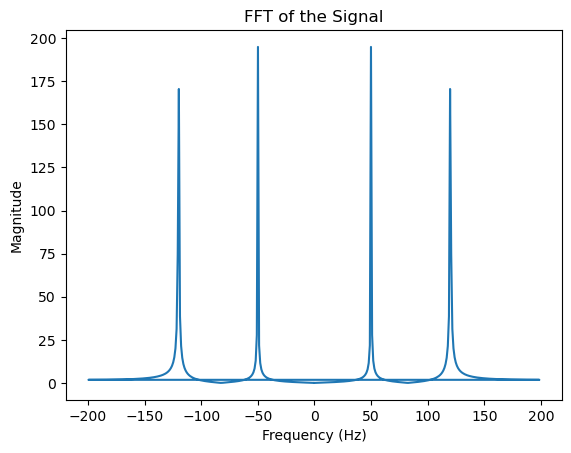

In [77]:
# Generate a sample signal
time = np.linspace(0, 1, 400)
signal = np.sin(2 * np.pi * 50 * time) + np.sin(2 * np.pi * 120 * time)

# Perform FFT
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=time[1] - time[0])

# Plot the FFT result
import matplotlib.pyplot as plt
plt.plot(frequencies, np.abs(signal_fft))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


In [78]:
from scipy import optimize

# Define a simple quadratic function
def f(x):
    return x**2 + 10*np.sin(x)

# Find the minimum of the function
result = optimize.minimize(f, x0=0)  # Start the search at x=0
print("Function minimum:", result.x)

# Numerical integration
from scipy.integrate import quad

result, error = quad(np.sin, 0, np.pi)
print("Integral of sin(x) from 0 to pi:", result)


Function minimum: [-1.30644012]
Integral of sin(x) from 0 to pi: 2.0


In [79]:
# Normalizing data
data = np.random.rand(100, 3)  # Random dataset with 3 features
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
print("Normalized Data:\n", normalized_data)

# Generating polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data)
print("Polynomial Features:\n", poly_features)


Normalized Data:
 [[-0.07867606  1.54618142 -1.29728695]
 [-0.10420612 -1.27499644  0.53398214]
 [ 1.50242555 -0.28922969 -0.06329412]
 [-1.11531425 -1.24799388 -0.51755026]
 [ 1.35492871 -1.26585454  0.44063684]
 [ 1.35306439 -1.06624746  0.48733713]
 [-1.55077168 -1.39048182  1.92834303]
 [-0.05628639 -0.86397572  0.6636992 ]
 [-0.51667831  0.7977934   1.76684069]
 [ 0.99008777 -0.06148516 -0.26800809]
 [-0.46113287 -1.23992938 -0.25505175]
 [-0.95954609  0.11906083  0.67255312]
 [-1.59912787  0.06741177 -1.06307189]
 [-0.97347682  0.57885872  0.51008799]
 [ 0.25459418  0.16654153 -1.58046817]
 [ 0.5041768  -0.29322821  0.82043648]
 [-0.6093574   0.63011243 -0.66525166]
 [-0.18071358  0.40110395  1.64799404]
 [-0.43537875  0.33215211  0.42583036]
 [-0.92600611  0.21720443 -1.45598939]
 [-0.05346763 -0.42508215  1.49828225]
 [ 0.91533587  1.28506151  1.02704189]
 [-0.55417338 -0.53244166 -1.23664048]
 [-0.44137591  1.14908844 -0.07498698]
 [ 1.04614549  0.74272252  0.80511854]
 [-1.28